In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=120)

In [2]:
survey_1 = 'SDSS'
survey_2 = 'LSST_DESI'
deltaz = 0.1 # LSST deltaz
rlim = 25.3

This notebook makes a 2D plot of the ratio of statistical-only signal to noise from the Blazek et al case and from the shape-measurement case as a function of a and the percentage covaraince between methods.

In [3]:
# Load StoN from Blazek method for each survey under consideration (only one value). We actually saved the square of what we want.
StoNsq_Blazek_1 = np.loadtxt('../txtfiles/StoN/StoN_stat_sysB_Blazek_'+survey_1+'_deltaz=0.17_rlim=22.0_fixcz.txt')
StoNsq_Blazek_2 = np.loadtxt('../txtfiles/StoN/StoN_stat_sysB_Blazek_'+survey_2+'_deltaz='+str(deltaz)+'_rlim='+str(rlim)+'_fixcz.txt')
StoN_Blazek_1 = np.sqrt(StoNsq_Blazek_1)
StoN_Blazek_2 = np.sqrt(StoNsq_Blazek_2)
print "StoN Blazek, SDSS=", StoN_Blazek_1, "and LSST+DESI=", StoN_Blazek_2

StoN Blazek, SDSS= 0.993266727394 and LSST+DESI= 6.34181589911


In [4]:
# Load vectors of a and the percentage covariance between methods for the shape measurement case
a_1 = np.loadtxt('../txtfiles/a_survey='+survey_1+'.txt')
covperc_1 = np.loadtxt('../txtfiles/rho_survey='+survey_1+'.txt')
a_2 = np.loadtxt('../txtfiles/a_survey='+survey_2+'.txt')
covperc_2 = np.loadtxt('../txtfiles/rho_survey='+survey_2+'.txt')

# Load the matrix of StoN values from the shape-measurement method at each pair of a / % covariance values
StoNsq_shapes_1 = np.loadtxt('../txtfiles/StoN/StoNsq_stat_sysB_shapes_survey='+survey_1+'_rlim=22.0_fixB.txt')
StoN_shapes_1 = np.sqrt(StoNsq_shapes_1)
StoNsq_shapes_2 = np.loadtxt('../txtfiles/StoN/StoNsq_stat_sysB_shapes_survey='+survey_2+'_rlim='+str(rlim)+'_fixStoN.txt')
StoN_shapes_2 = np.sqrt(StoNsq_shapes_2)

print StoN_shapes_2 / StoN_shapes_1

[[ 8.74936575  8.70831738  8.65655827  8.58926345  8.4981939   8.36802173  8.16658886  7.81288951  7.02527861]
 [ 8.81990137  8.78645156  8.74411412  8.68880208  8.61346687  8.50481832  8.33443512  8.0285494   7.31595306]
 [ 8.88388612  8.85755633  8.8241152   8.78023085  8.72010365  8.63266044  8.49378819  8.23906573  7.61800999]
 [ 8.94072149  8.92089925  8.89564508  8.86237125  8.81653555  8.74936575  8.64143678  8.43941904  7.92425578]
 [ 8.98985293  8.97579624  8.95783911  8.93409642  8.9012348   8.85275088  8.77402612  8.62391667  8.22437684]
 [ 9.03078326  9.02162971  9.0099097   8.99436784  8.97277038  8.94072149  8.88821183  8.78645156  8.50481832]
 [ 9.06308545  9.05786604  9.05117118  9.04227227  9.02986641  9.01137171  8.98084753  8.92089925  8.74936575]
 [ 9.08641408  9.08407152  9.08106284  9.07705681  9.071459    9.06308545  9.04919093  9.02162971  8.94072149]
 [ 9.10051504  9.09992594  9.09916872  9.09815944  9.09674712  9.09463012  9.0911057   9.08407152  9.06308545]]


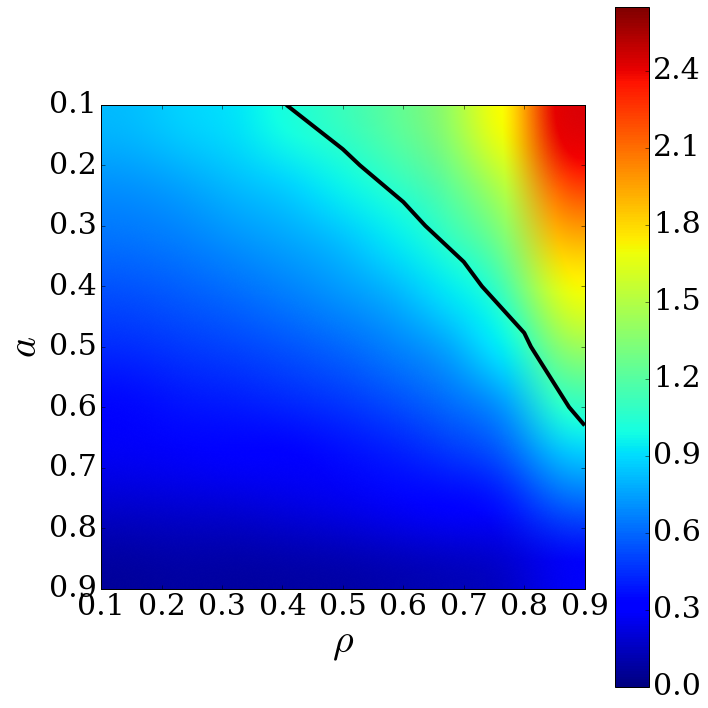

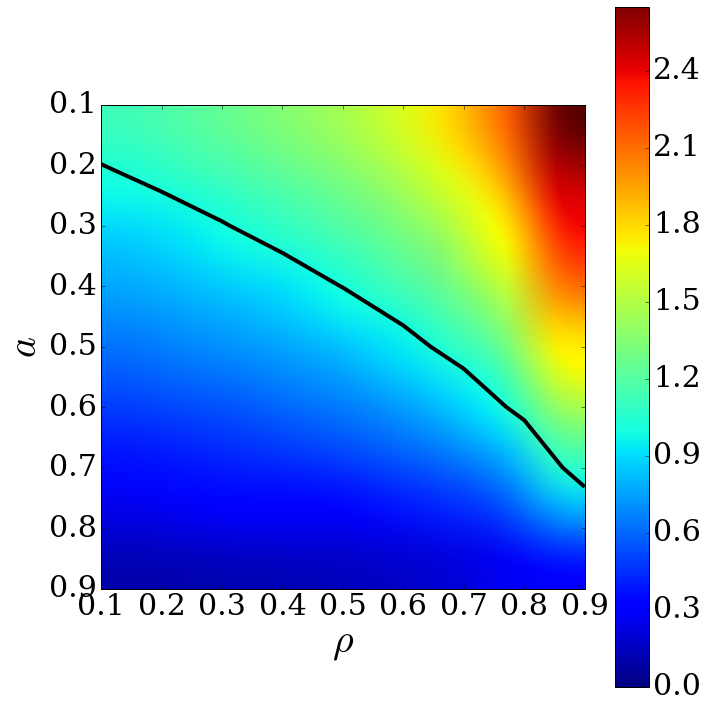

In [9]:
# Make a 2D colour plot of the ratio of the S to N values for each survey
# If the value plotted is greater than 1, the shape measurment does better for that combination of a and % cov.

StoNratio_1 = StoN_shapes_1 / StoN_Blazek_1


plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "serif"
plt.imshow(StoNratio_1, extent=[covperc_1[0], covperc_1[-1], a_1[-1], a_1[0]], aspect=1, interpolation='spline36')
plt.hold(True)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize='30')
plt.clim(0,2.65)
plt.contour(covperc_1, a_1, StoNratio_1, [1.0], colors='k', linewidths=4)
plt.xlabel('$\\rho$', fontsize=40)
plt.ylabel('$a$', fontsize=40)
plt.tick_params(axis='both', labelsize='30')
#plt.title('(Stat S/N, shapes method) / (Stat S/N, Blazek method), SDSS', fontsize=20)
#plt.show()
plt.tight_layout()
plt.savefig('../plots/StoN_2d_stat_sysB_'+survey_1+'_fixcz.png')

StoNratio_2 = StoN_shapes_2 / StoN_Blazek_2

plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "serif"
plt.imshow(StoNratio_2, extent=[covperc_2[0], covperc_2[-1], a_2[-1], a_2[0]], aspect=1, interpolation='spline36')
plt.hold(True)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize='30')
plt.clim(0,2.65)
plt.contour(covperc_2, a_2, StoNratio_2, [1.0], colors='k', linewidths=4)
plt.xlabel('$\\rho$', fontsize=40)
plt.ylabel('$a$', fontsize=40)
plt.tick_params(axis='both', labelsize='30')
#plt.show()
plt.tight_layout()
plt.savefig('../plots/StoN_2d_stat_sysB_'+survey_2+'_rlim='+str(rlim)+'_fixcz.png')

#print "SDSS, min ratio=", np.amin(StoNratio_1), "max=", np.amax(StoNratio_1)
#print "LSST, min ratio=", np.amin(StoNratio_2), "max=", np.amax(StoNratio_2)


# These ratios should be off by a value independent of a / covperc. What is it?
#print "difference=", StoNratio_2 / StoNratio_1